## Matplotlib Assignment

In [352]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import optimize

#### Ques 1: We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the dataset given below.
#### Task:
#### 1.fitting it to the periodic function
#### 2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [353]:
#List the data in the form of an array
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [354]:
#Create the dataframe
df=pd.DataFrame(zip(Max,Min),columns={'Max','Min'})

In [355]:
#Create month column
months=np.arange(12)
df['Month']=months

In [356]:
df

,Max,Min,Month
0,39,21,0
1,41,23,1
2,43,27,2
3,47,28,3
4,49,32,4
5,51,35,5
6,45,31,6
7,38,28,7
8,37,21,8
9,29,19,9


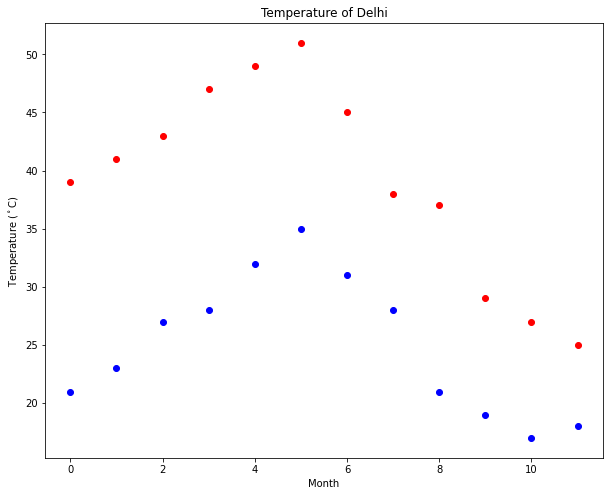

In [357]:
#Plot the figure 
plt.figure(figsize=(10,8))
plt.scatter(x='Month',y='Max',color='red',data=df)
plt.scatter(x='Month',y='Min',color='blue',data=df)
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperature of Delhi')
plt.show()

In [358]:
#Create the function for fitting it to periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

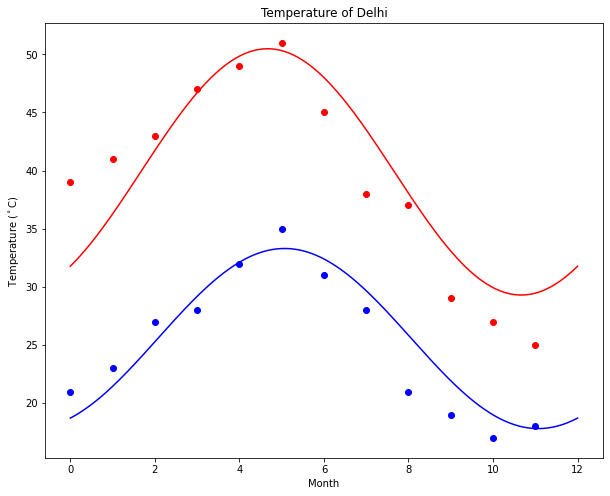

In [359]:
#Plot the final graph
days = np.linspace(0, 12, num=365)
plt.figure(figsize=(10,8))
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('Temperature of Delhi')
plt.show()

### Ques: This assignment is for visualization using matplotlib:
### data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
### Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [360]:
#Import the data
df=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [361]:
#check the initial data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [363]:
#Check the male/female proportion
d=df['sex'].value_counts()
d

male      843
female    466
Name: sex, dtype: int64

In [364]:
df[df['sex'].isna()==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


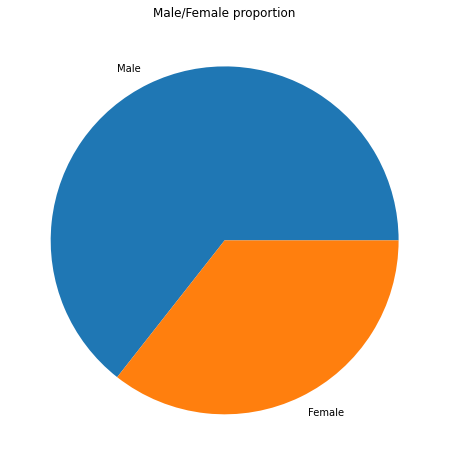

In [365]:
#Create the pie chart
labels=['Male','Female']
plt.figure(figsize=(10,8))
plt.pie(d,labels=labels)
plt.title('Male/Female proportion')
plt.show()

In [366]:
#Check the age 
df['age'].value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.6667      1
20.5000     1
23.5000     1
24.5000     1
60.5000     1
Name: age, Length: 98, dtype: int64

In [367]:
#Convert the age column into numeric
df['age']=np.round(df['age'])

In [368]:
df[df['age'].isna()==True]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3.0,0.0,"Wiseman, Mr. Phillippe",male,NaN,0.0,0.0,A/4. 34244,7.2500,NaN,S,NaN,NaN,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN


In [369]:
df['age'].mean()

29.87093690248566

In [370]:
#Fill the nan values with mean
df['age'].fillna(np.round(df['age'].mean()),inplace=True)

In [371]:
df['age']=df['age'].astype('int')

In [372]:
#Fill the nan values with mean
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [373]:
#Map male/female with 0 and 1
df['sex']=df['sex'].map({'female':0,'male':1})

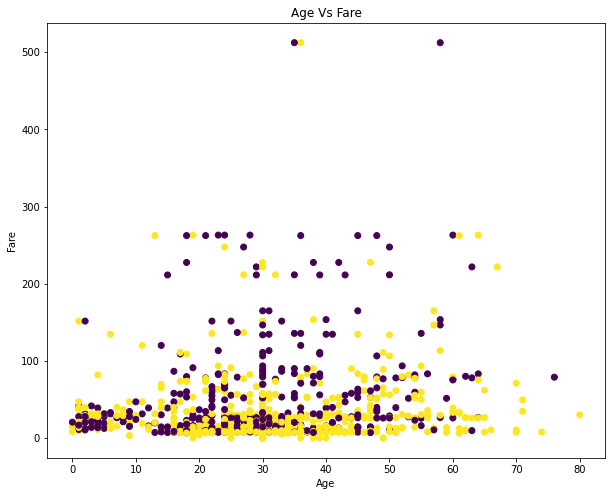

In [375]:
#Final Plot
plt.figure(figsize=(10,8))
plt.scatter('age','fare',c='sex',data=df)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age Vs Fare')
plt.show()